In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Sample - Superstore.csv',encoding='cp1252')


## Which product categories contribute the most to the overall sales and profit?

<Figure size 1200x600 with 0 Axes>

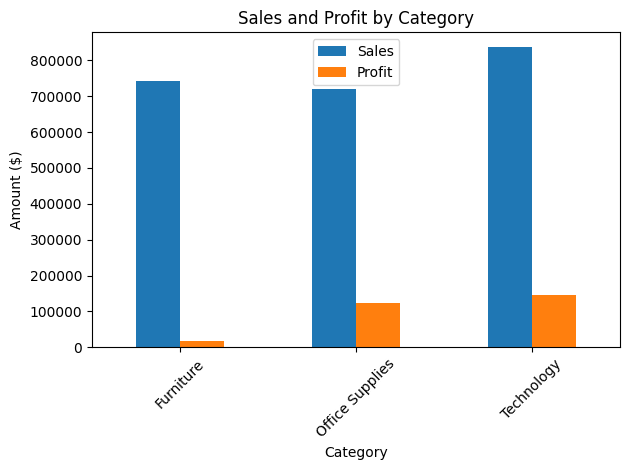

In [4]:
# Category analysis
category_performance = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).round(2)

# Visualization
plt.figure(figsize=(12, 6))
category_performance.plot(kind='bar')
plt.title('Sales and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
# Sub-category analysis
subcategory_perf = df.groupby('Sub-Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values('Sales', ascending=False).head(10)

print("\nTop 10 Sub-Categories by Sales:")
print(subcategory_perf)


Top 10 Sub-Categories by Sales:
                    Sales      Profit
Sub-Category                         
Phones        330007.0540  44515.7306
Chairs        328449.1030  26590.1663
Storage       223843.6080  21278.8264
Tables        206965.5320 -17725.4811
Binders       203412.7330  30221.7633
Machines      189238.6310   3384.7569
Accessories   167380.3180  41936.6357
Copiers       149528.0300  55617.8249
Bookcases     114879.9963  -3472.5560
Appliances    107532.1610  18138.0054


## Is there a correlation between discount percentage and sales volume?

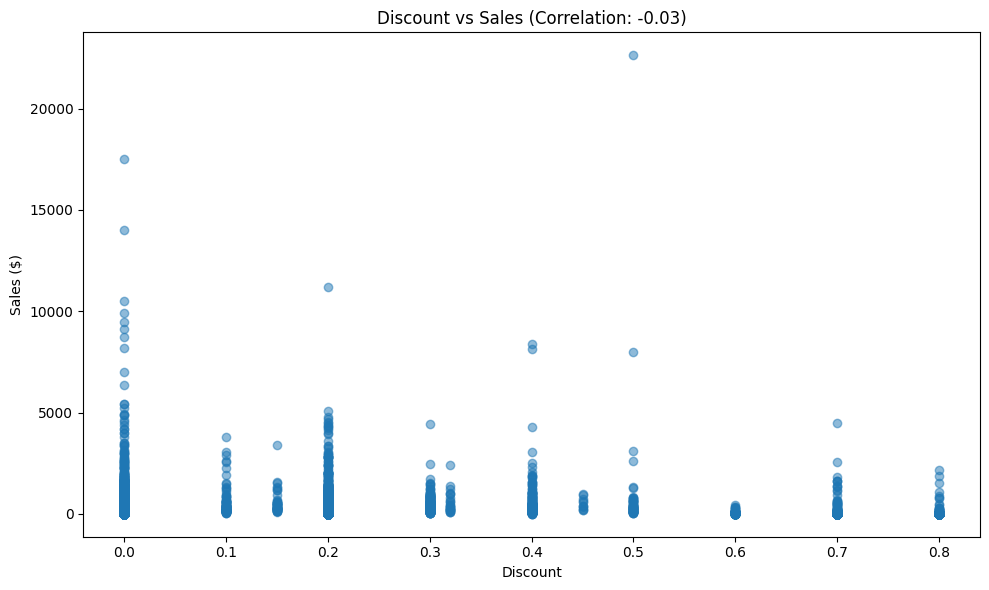

In [6]:
# Calculate correlation
correlation = df['Discount'].corr(df['Sales'])

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Sales'], alpha=0.5)
plt.title(f'Discount vs Sales (Correlation: {correlation:.2f})')
plt.xlabel('Discount')
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()

In [8]:
# Average sales by discount ranges
df['Discount_Range'] = pd.cut(df['Discount'], bins=5)
discount_analysis = df.groupby('Discount_Range')['Sales'].mean()
print("\nAverage Sales by Discount Range:")
discount_analysis


Average Sales by Discount Range:


C:\Users\Ard Al Jood\AppData\Local\Temp\ipykernel_6936\1005852684.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby('Discount_Range')['Sales'].mean()


Discount_Range
(-0.0008, 0.16]    236.617383
(0.16, 0.32]       225.598180
(0.32, 0.48]       561.763862
(0.48, 0.64]       321.388431
(0.64, 0.8]         80.200610
Name: Sales, dtype: float64

## Which region has the highest sales and profit?

<Figure size 1200x600 with 0 Axes>

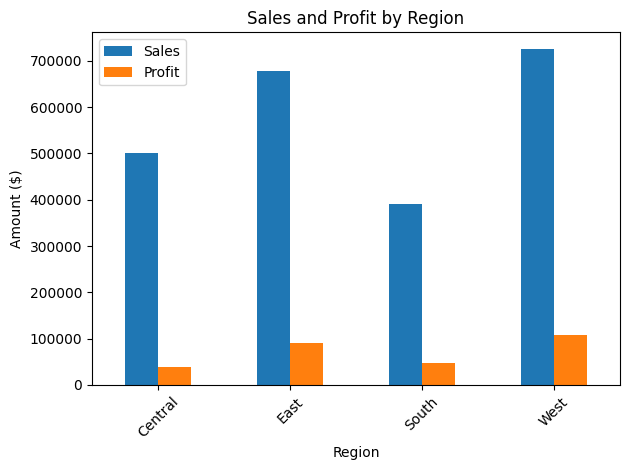


Regional Performance:
             Sales     Profit  Order ID
Region                                 
Central  501239.89   39706.36      2323
East     678781.24   91522.78      2848
South    391721.90   46749.43      1620
West     725457.82  108418.45      3203


In [9]:
regional_performance = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

# Visualization
plt.figure(figsize=(12, 6))
regional_performance[['Sales', 'Profit']].plot(kind='bar')
plt.title('Sales and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nRegional Performance:")
print(regional_performance)

## What time of year (month, quarter) shows the highest sales?

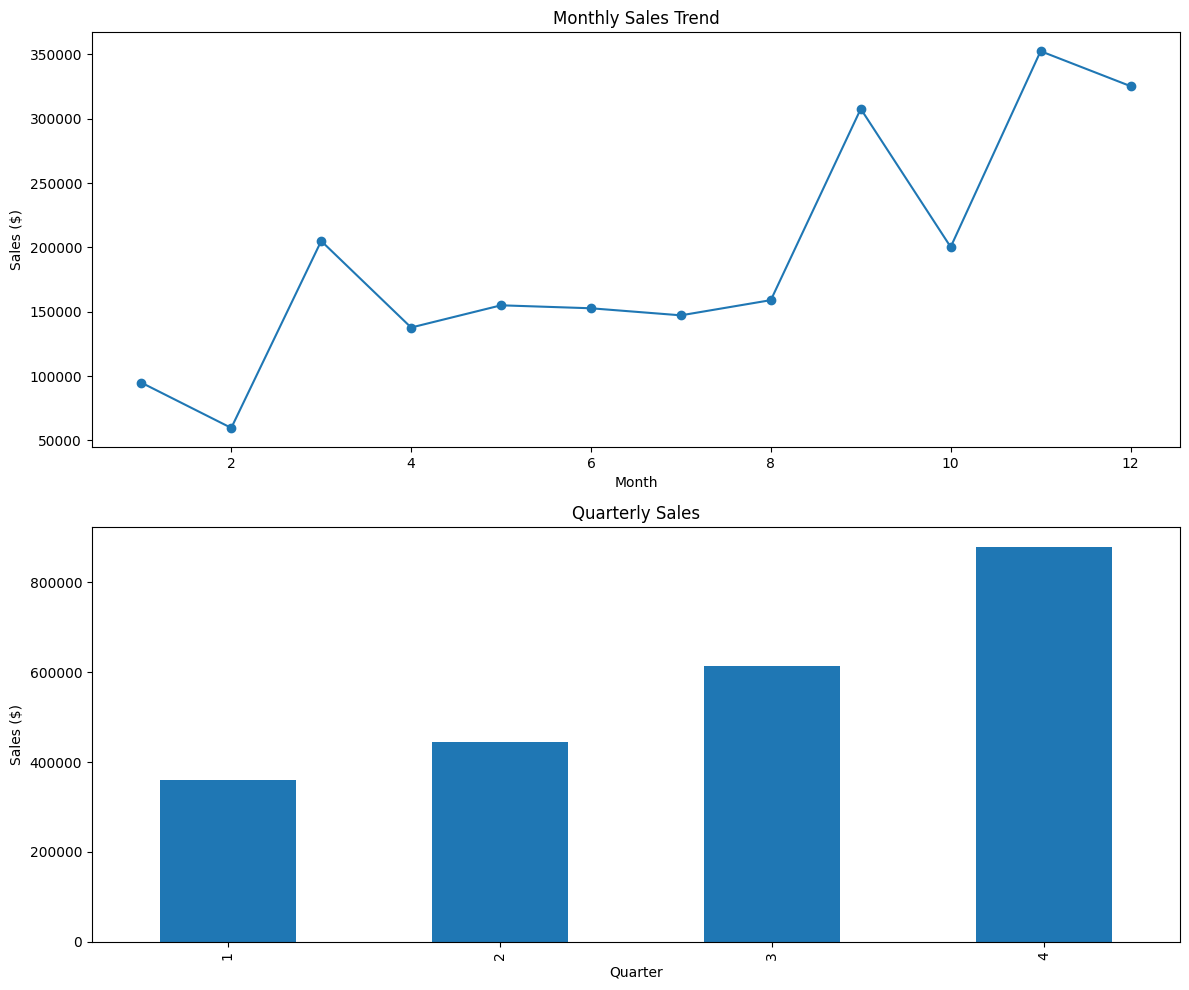

In [10]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter

# Monthly analysis
monthly_sales = df.groupby('Month')['Sales'].sum()

# Quarterly analysis
quarterly_sales = df.groupby('Quarter')['Sales'].sum()

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

monthly_sales.plot(kind='line', marker='o', ax=ax1)
ax1.set_title('Monthly Sales Trend')
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales ($)')

quarterly_sales.plot(kind='bar', ax=ax2)
ax2.set_title('Quarterly Sales')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Sales ($)')
plt.tight_layout()
plt.show()

# How does sales performance vary between different customer segments?

<Figure size 1000x600 with 0 Axes>

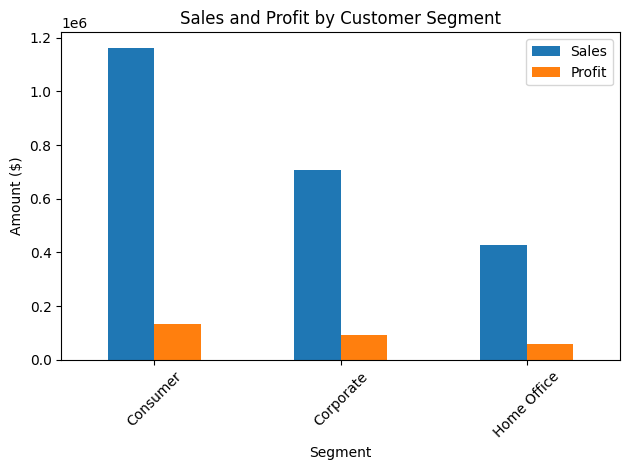


Segment Performance:
                  Sales     Profit  Customer ID
Segment                                        
Consumer     1161401.34  134119.21          409
Corporate     706146.37   91979.13          236
Home Office   429653.15   60298.68          148


In [11]:
# Segment analysis
segment_performance = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Customer ID': 'nunique'
}).round(2)

# Visualization
plt.figure(figsize=(10, 6))
segment_performance[['Sales', 'Profit']].plot(kind='bar')
plt.title('Sales and Profit by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Amount ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nSegment Performance:")
print(segment_performance)

# What is the average sales per transaction, and how does it vary across different regions?

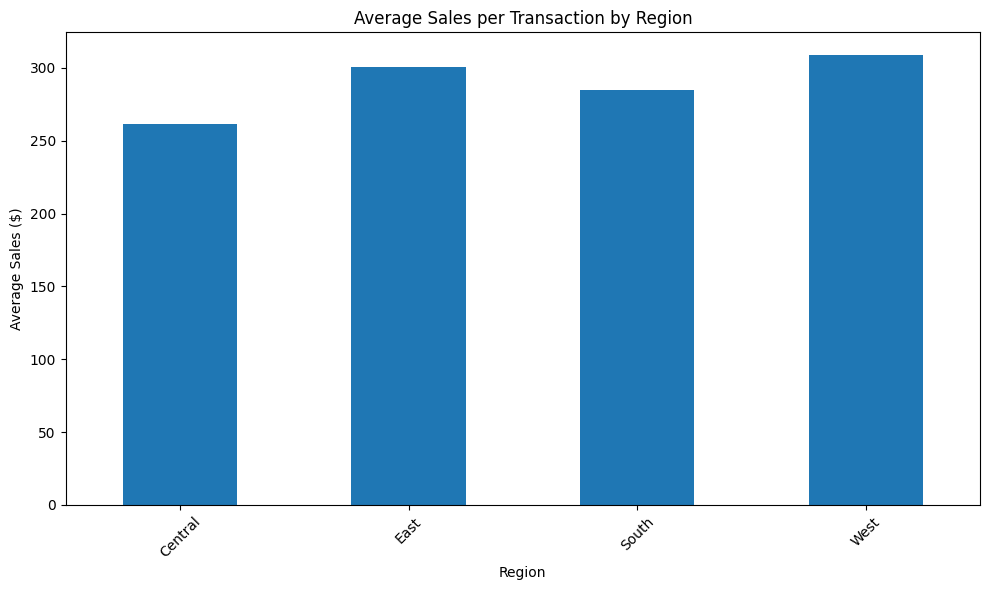

In [12]:
# Calculate average transaction value by region
avg_transaction = df.groupby('Region').agg({
    'Sales': lambda x: x.sum() / len(x.unique())
}).round(2)

# Visualization
plt.figure(figsize=(10, 6))
avg_transaction['Sales'].plot(kind='bar')
plt.title('Average Sales per Transaction by Region')
plt.xlabel('Region')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Which products have the highest and lowest profit margins?

In [13]:
# Calculate profit margin for each product
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

# Get products with highest and lowest margins
top_margin = df.groupby('Product Name')['Profit_Margin'].mean().sort_values(ascending=False).head(10)
bottom_margin = df.groupby('Product Name')['Profit_Margin'].mean().sort_values().head(10)

print("Top 10 Products by Profit Margin:")
print(top_margin)
print("\nBottom 10 Products by Profit Margin:")
print(bottom_margin)

Top 10 Products by Profit Margin:
Product Name
Southworth Structures Collection                                                         50.0
Xerox 1890                                                                               50.0
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier                    50.0
Adams Telephone Message Book w/Frequently-Called Numbers Space, 400 Messages per Book    50.0
Avery 475                                                                                50.0
Tops Green Bar Computer Printout Paper                                                   50.0
Avery 5                                                                                  49.0
Xerox 1918                                                                               49.0
Strathmore #10 Envelopes, Ultimate White                                                 49.0
Hewlett-Packard Desktjet 6988DT Refurbished Printer                                      49.0
Name: Profit_

# Is there a relationship between the number of items sold and the profit earned?

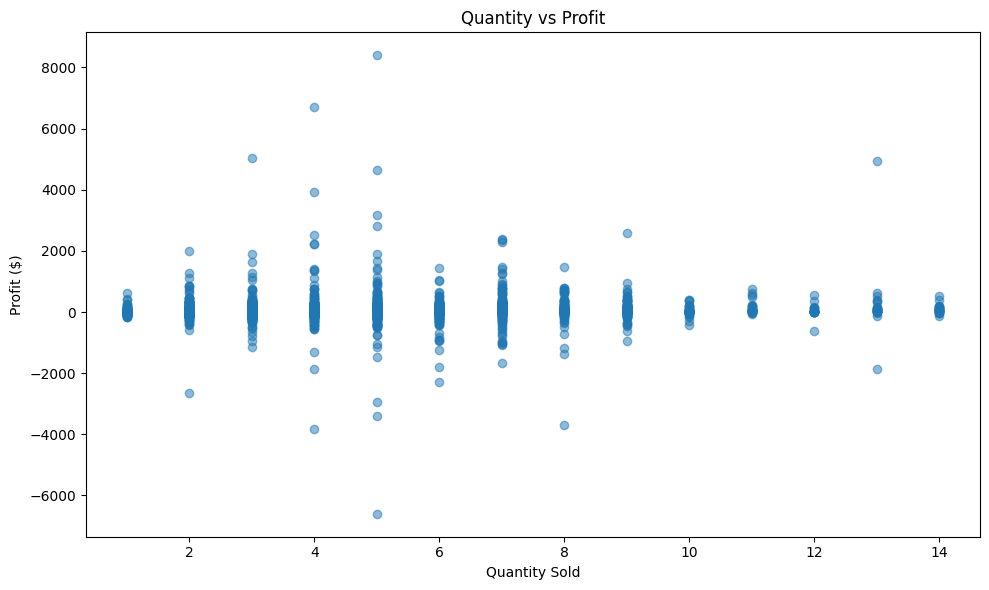


Correlation between Quantity and Profit: 0.07


In [14]:
# Correlation analysis
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Profit'], alpha=0.5)
plt.title('Quantity vs Profit')
plt.xlabel('Quantity Sold')
plt.ylabel('Profit ($)')
plt.tight_layout()
plt.show()

correlation = df['Quantity'].corr(df['Profit'])
print(f"\nCorrelation between Quantity and Profit: {correlation:.2f}")

# What impact do shipping costs have on overall sales and profit?

<Figure size 1000x600 with 0 Axes>

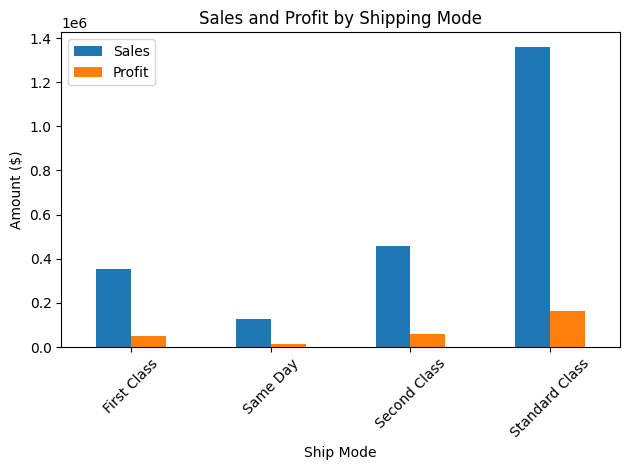

In [15]:
# Analysis by ship mode
shipping_analysis = df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

# Visualization
plt.figure(figsize=(10, 6))
shipping_analysis[['Sales', 'Profit']].plot(kind='bar')
plt.title('Sales and Profit by Shipping Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Amount ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Are there any noticeable anomalies or outliers in the sales data?

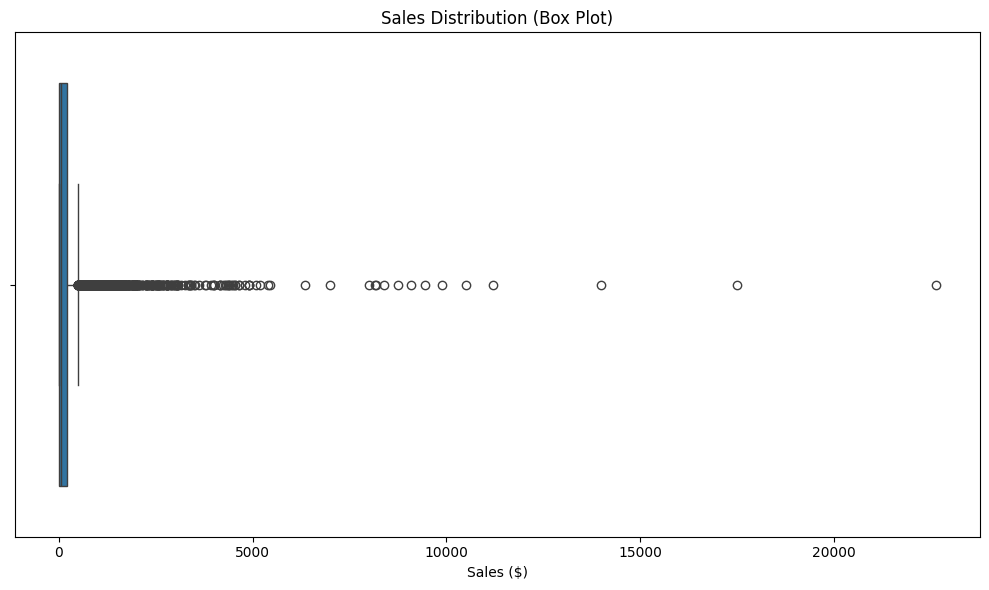


Number of outliers: 1167


In [16]:
# Box plot for sales outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Sales Distribution (Box Plot)')
plt.xlabel('Sales ($)')
plt.tight_layout()
plt.show()

# Calculate outliers
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))]
print(f"\nNumber of outliers: {len(outliers)}")

# How does the order quantity affect the overall sales performance?

C:\Users\Ard Al Jood\AppData\Local\Temp\ipykernel_6936\1390737330.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_analysis = df.groupby('Quantity_Range').agg({


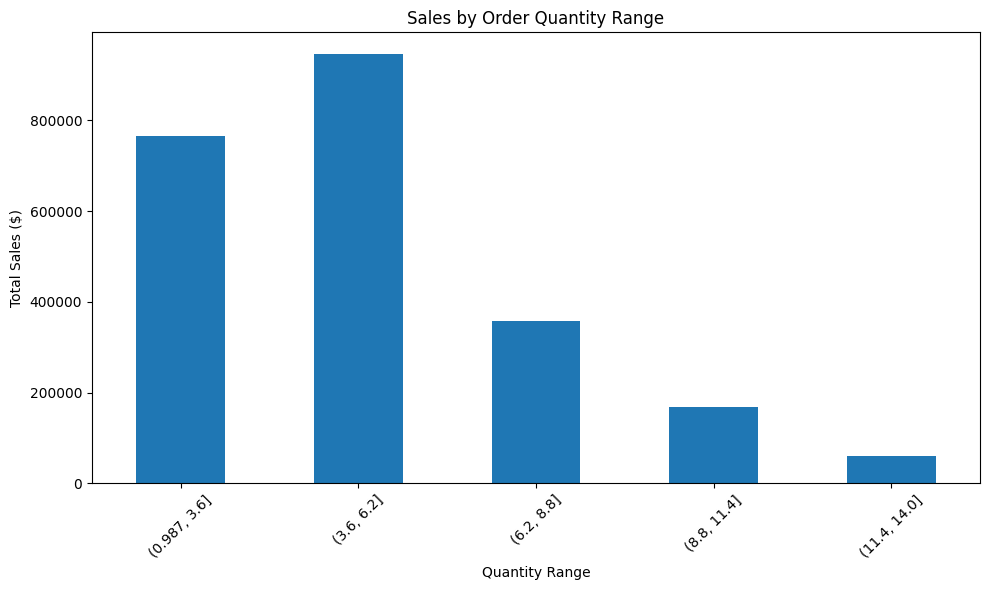

In [17]:
# Group by quantity ranges
df['Quantity_Range'] = pd.cut(df['Quantity'], bins=5)
quantity_analysis = df.groupby('Quantity_Range').agg({
    'Sales': 'sum',
    'Profit': 'mean'
}).round(2)

# Visualization
plt.figure(figsize=(10, 6))
quantity_analysis['Sales'].plot(kind='bar')
plt.title('Sales by Order Quantity Range')
plt.xlabel('Quantity Range')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Is there any pattern in sales performance based on the 'Ship
Mode'?

<Figure size 1200x600 with 0 Axes>

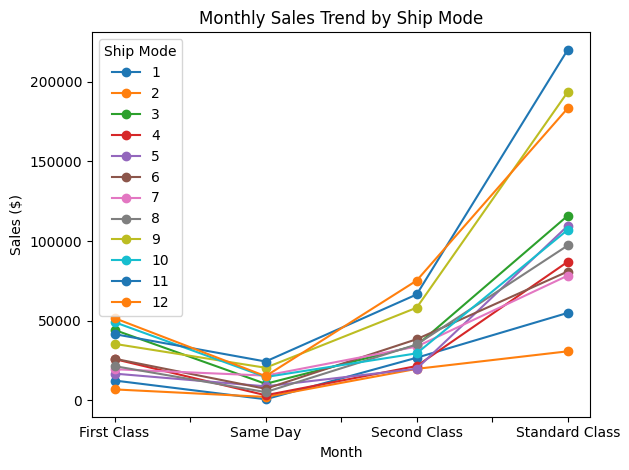

In [19]:
# Detailed shipping analysis
ship_mode_analysis = df.groupby(['Ship Mode', df['Order Date'].dt.month]).agg({
    'Sales': 'sum',
    'Order ID': 'count'
}).round(2)

# Visualization
plt.figure(figsize=(12, 6))
ship_mode_pivot = ship_mode_analysis['Sales'].unstack()
ship_mode_pivot.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend by Ship Mode')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.show()

# What are the trends in profit margins over time (year/quarter/month)?

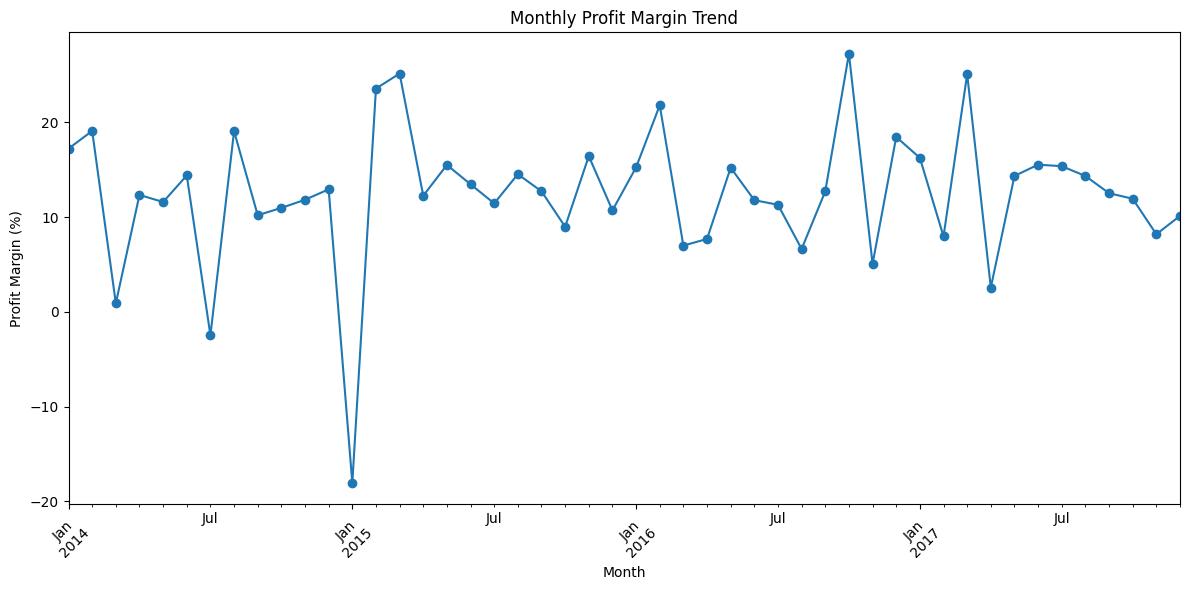

In [20]:
# Calculate monthly profit margins
monthly_margins = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
monthly_margins['Profit_Margin'] = (monthly_margins['Profit'] / monthly_margins['Sales']) * 100

# Visualization
plt.figure(figsize=(12, 6))
monthly_margins['Profit_Margin'].plot(kind='line', marker='o')
plt.title('Monthly Profit Margin Trend')
plt.xlabel('Month')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()